In [3]:
import math
import numpy as np
from scipy import optimize

In [6]:
def f(var):
    (x,y) = var
    
    first_eq = x * y - 2 * y - 2**x
    second_eq = math.log(x) - y - math.cos(x)
    
    return [first_eq,second_eq]

In [7]:
optimize.fsolve(f,(0.1,0))

array([ 0.66687559, -1.19090982])

In [38]:
def wymsol(var,parms,rtot,ltot):
    
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    (x1, x2, x3, x4, x5, x6) = var
    
    eq1 = x2 + 2*x3 + x4 + 2*x5 + 2*x6 - rtot
    eq2 = x1 + x4 + x5 + 2*x6 - ltot
    eq3 = l20 * x2**2 - x3
    eq4 = k11 * x1 * x2 - x4
    eq5 = l20 * k21 * x2**2 * x1 - x5
    eq6 = l20 * k21 * k22 * x2**2 * x1**2 - x6
    
    return np.array([eq1,eq2,eq3,eq4,eq5,eq6])

In [39]:
guess = (1.,1.,1.,1.,1.,1.)

In [40]:
parm = np.array([0.4,8.,2.,300.])

In [41]:
wymsol(guess,parm,0.01,0.01)

array([  7.99000000e+00,   4.99000000e+00,   2.99000000e+02,
        -6.00000000e-01,   2.39900000e+03,   4.79900000e+03])

In [17]:
f((0.1,0))

[-1.0717734625362931, -3.297589258272071]

In [42]:
optimize.fsolve(wymsol,guess,args=(parm,1.0,0.01))

array([  2.07234487e-03,   3.96771417e-02,   4.72282671e-01,
         3.28898884e-05,   7.82986056e-03,   3.24523427e-05])

In [48]:
optimize.root(wymsol,guess,args=(parm,1.0,0.01),method='lm').x

array([  2.07234487e-03,   3.96771417e-02,   4.72282671e-01,
         3.28898884e-05,   7.82986056e-03,   3.24523427e-05])

In [49]:
lig = np.array([0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 2.0, 3.0, 5.0, 8.0, 10.0])
[optimize.root(wymsol,guess,args=(parm,1.0,i),method='lm').x for i in lig]

[array([  2.07234487e-03,   3.96771417e-02,   4.72282671e-01,
          3.28898884e-05,   7.82986056e-03,   3.24523427e-05]),
 array([  4.17100764e-03,   3.93554508e-02,   4.64655453e-01,
          6.56607544e-05,   1.55046515e-02,   1.29340040e-04]),
 array([  6.29635740e-03,   3.90349414e-02,   4.57117995e-01,
          9.83111769e-05,   2.30254262e-02,   2.89952625e-04]),
 array([  1.06286114e-02,   3.83975233e-02,   4.42310940e-01,
          1.63244942e-04,   3.76092089e-02,   7.99467337e-04]),
 array([  1.73365658e-02,   3.74506132e-02,   4.20764529e-01,
          2.59706008e-04,   5.83568955e-02,   2.02341632e-03]),
 array([  2.19527467e-02,   3.68256543e-02,   4.06838643e-01,
          3.23369705e-04,   7.14498056e-02,   3.13703897e-03]),
 array([ 0.0468832 ,  0.03378112,  0.34234932,  0.00063351,  0.12840344,
         0.01203993]),
 array([ 0.07519537,  0.03088163,  0.28610253,  0.00092886,  0.17210867,
         0.02588355]),
 array([ 0.14358499,  0.0255783 ,  0.19627485,  0.00

In [50]:
import sys

In [51]:
sys.path.append('./ligbind/')

In [52]:
import ligbind

In [54]:
ligs = ligbind.helpers.dilser()

In [56]:
b = [optimize.root(wymsol,guess,args=(parm,1.0,i),method='lm').x for i in ligs]

In [60]:
c = np.stack(b)

In [61]:
c[0]

array([  2.06060628e-04,   3.99676620e-02,   4.79224202e-01,
         3.29430462e-06,   7.89993921e-04,   3.25573287e-07])

In [65]:
d = np.array(b)

In [72]:
d[:,0]

array([  2.06060628e-04,   4.12381140e-04,   8.25803275e-04,
         1.65578221e-03,   3.32836084e-03,   6.72466252e-03,
         1.37272082e-02,   2.86160757e-02,   6.22949695e-02,
         1.48236969e-01,   4.10859340e-01,   1.22288605e+00,
         3.17154644e+00,   7.22662191e+00,   1.54005501e+01,
         3.17760901e+01,   6.45399995e+01,   1.30073988e+02])

In [73]:
import matplotlib.pyplot as plt

In [74]:
%matplotlib inline

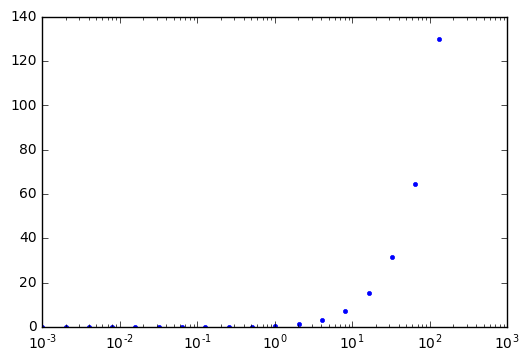

In [84]:
plt.semilogx(ligs,d[:,0],'.')

In [85]:
d[:,0]

array([  2.06060628e-04,   4.12381140e-04,   8.25803275e-04,
         1.65578221e-03,   3.32836084e-03,   6.72466252e-03,
         1.37272082e-02,   2.86160757e-02,   6.22949695e-02,
         1.48236969e-01,   4.10859340e-01,   1.22288605e+00,
         3.17154644e+00,   7.22662191e+00,   1.54005501e+01,
         3.17760901e+01,   6.45399995e+01,   1.30073988e+02])

In [86]:
parm

array([   0.4,    8. ,    2. ,  300. ])

In [88]:
a = ligbind.WymSim(parms=parm,sets=1)

In [89]:
a.bfrac

array([[ 0.00146758,  0.00293375,  0.00586171,  0.01169931,  0.02329463,
         0.04612139,  0.09006539,  0.17018449,  0.30017904,  0.4729287 ,
         0.65033043,  0.79203411,  0.88535322,  0.93961525,  0.96898467,
         0.9842788 ,  0.992085  ,  0.99602877],
       [ 0.00202221,  0.00403864,  0.00805413,  0.01601553,  0.03165972,
         0.06183817,  0.11787341,  0.21426016,  0.35860079,  0.53396807,
         0.70021558,  0.82548708,  0.90502811,  0.95033264,  0.97458468,
         0.98714206,  0.99353282,  0.99675678],
       [ 0.00243162,  0.00485318,  0.00966624,  0.01917335,  0.03772077,
         0.073024  ,  0.13706486,  0.24328744,  0.39486965,  0.56969666,
         0.72809461,  0.8436266 ,  0.91551206,  0.95599002,  0.97752634,
         0.98864237,  0.99429051,  0.99713753],
       [ 0.00279275,  0.00557107,  0.01108482,  0.02194339,  0.04300586,
         0.08267159,  0.15331245,  0.26719026,  0.42373104,  0.5971914 ,
         0.74899553,  0.85699631,  0.9231635 ,  0.960

In [91]:
ligbind.models.wymfunc()

TypeError: wymfunc() missing 3 required positional arguments: 'parm', 'lig', and 'rtot'

In [94]:
np.log(np.exp(0))

0.0

In [97]:
np.log(np.exp(1))

1.0

In [101]:
np.exp(np.log(2))

2.0

In [102]:
np.log(3**2)

2.1972245773362196

In [105]:
2* np.log(3)

2.1972245773362196

In [106]:
np.log(2**2)

1.3862943611198906

In [107]:
2*np.log(2)

1.3862943611198906

In [108]:
np.exp(2*np.log(2))

4.0